# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Farrel Nikoson
- Email: farrelnikoson@gmail.com
- Id Dicoding: vartzy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan diguankan

In [4]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [5]:
df.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
attr = df.Attrition.value_counts()
total_attr = attr[0] + attr[1]
total_attr /  attr[1] # Attrition rate = 6%

5.910614525139665

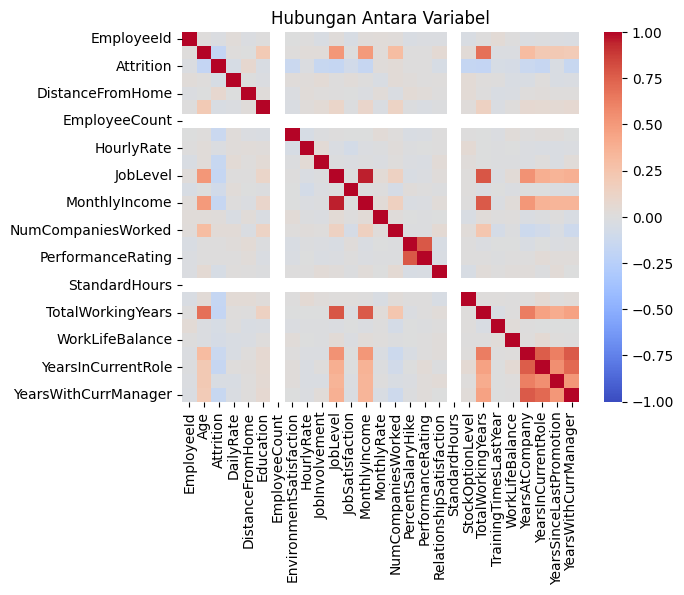

In [7]:
df_num = df.select_dtypes(include=['int64', 'float64'])
corr = df_num.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Hubungan Antara Variabel')
plt.show()

In [8]:
corr[['Attrition']].sort_values(by='Attrition', ascending=False) # Tidak ada variable yang terlihat berkorelasi...

,Attrition
Attrition,1.000000
DistanceFromHome,0.078074
NumCompaniesWorked,0.037429
MonthlyRate,0.023299
PerformanceRating,0.007755
PercentSalaryHike,0.004907
HourlyRate,-0.017524
EmployeeId,-0.017912
YearsSinceLastPromotion,-0.031944
Education,-0.032631


<ipython-input-9-671a13348b57>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


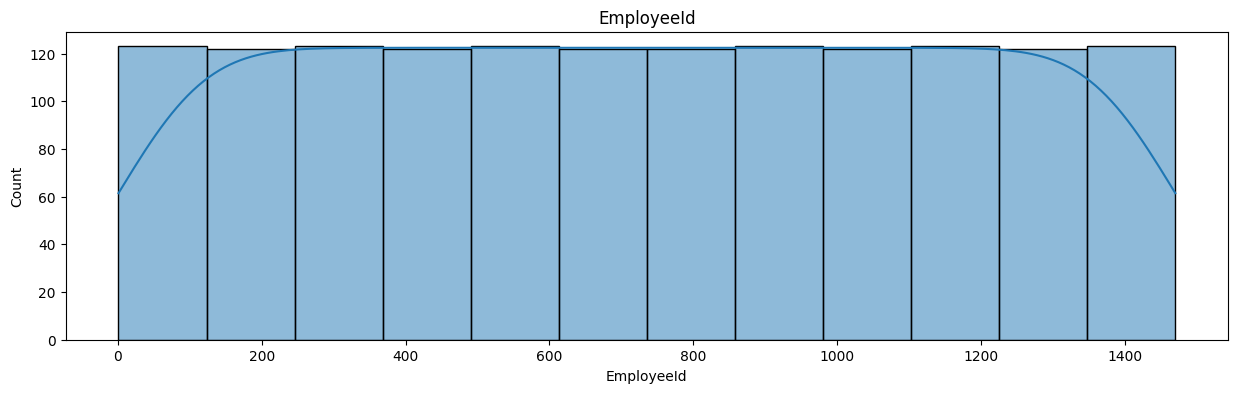

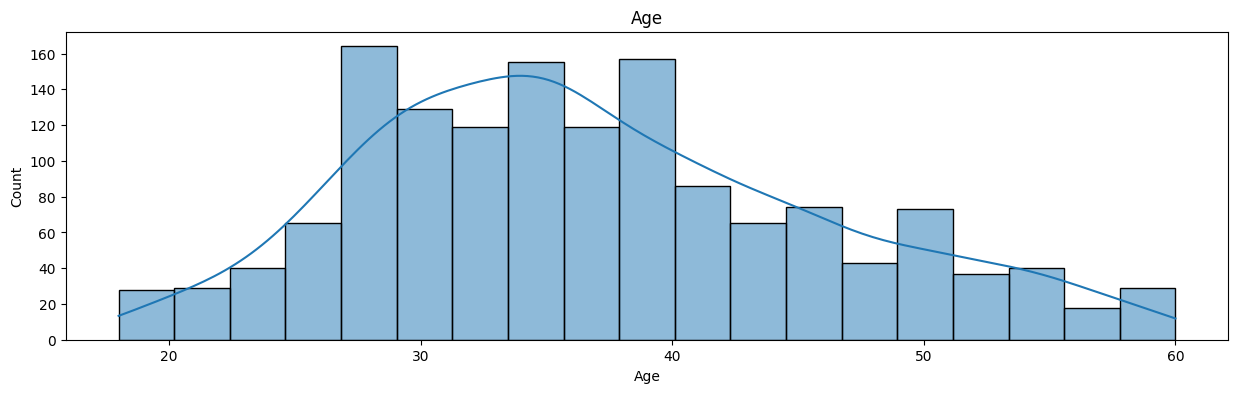

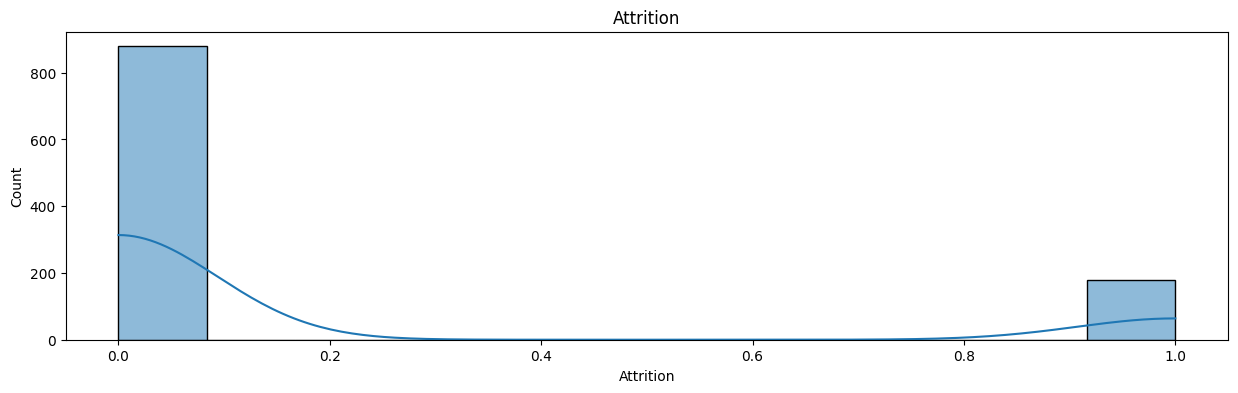

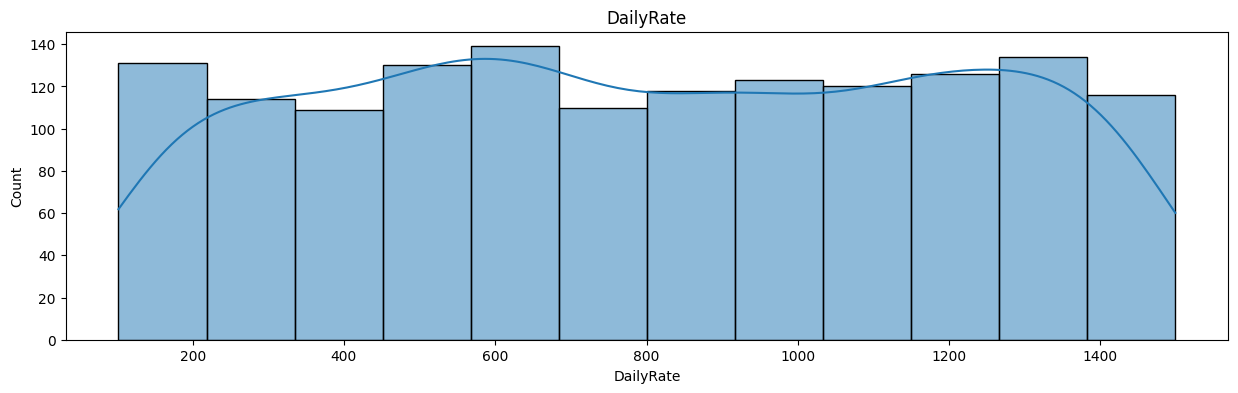

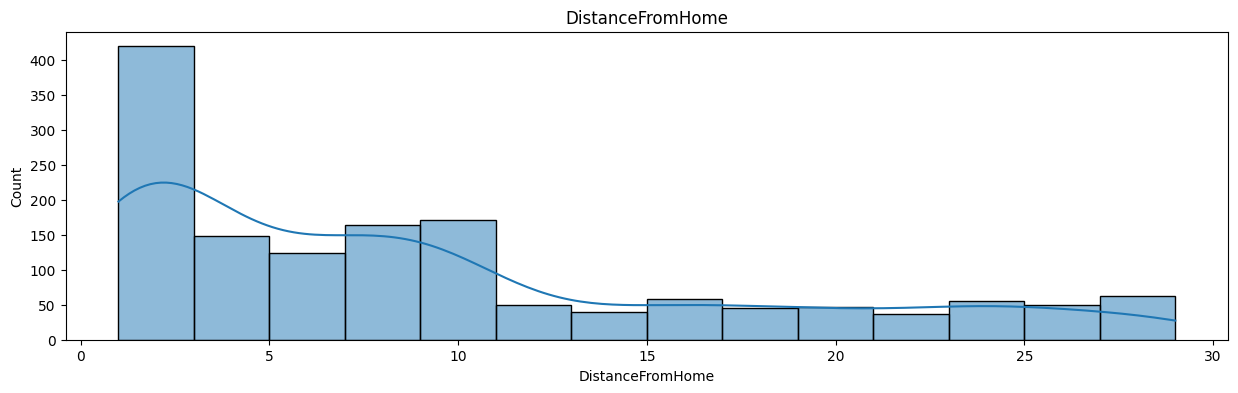

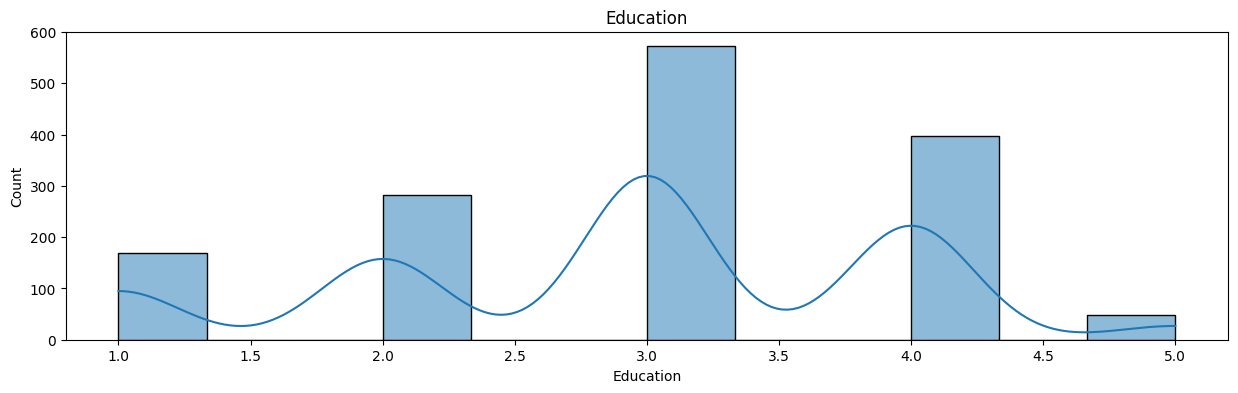

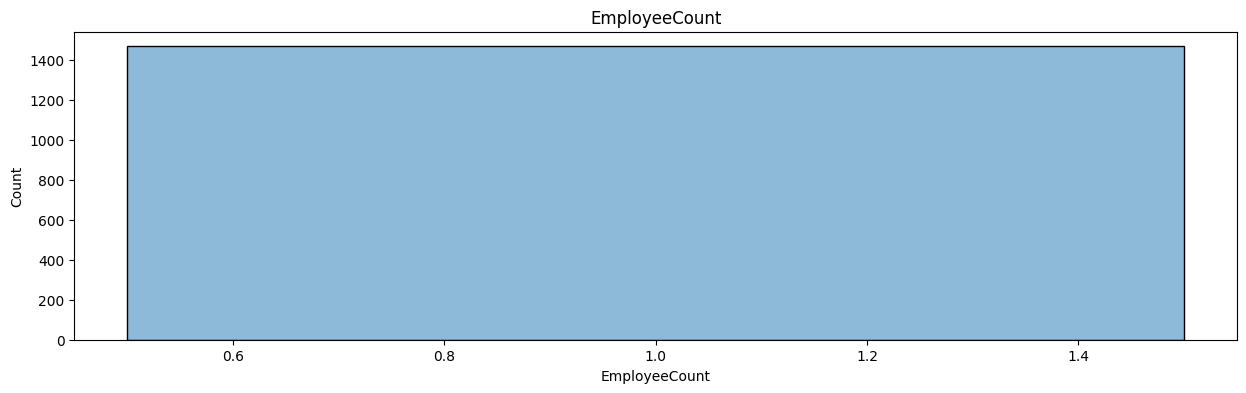

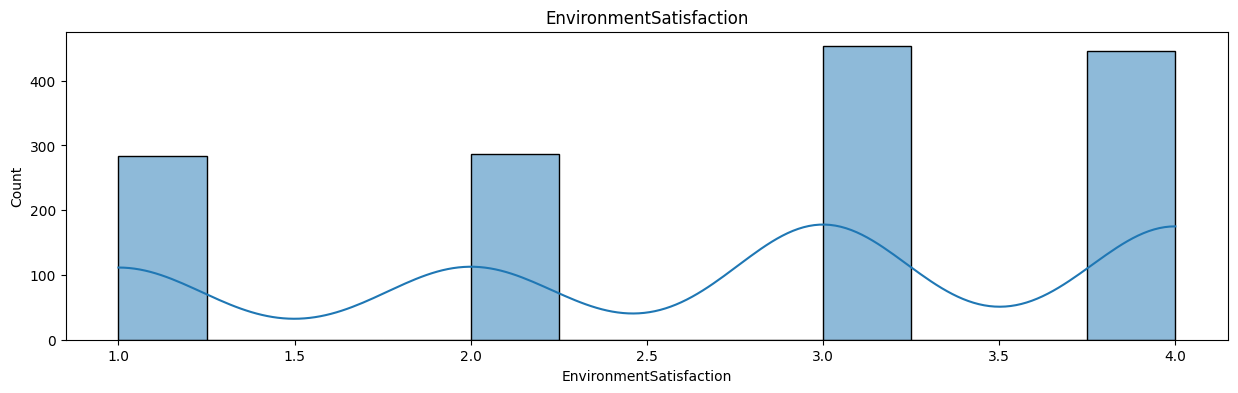

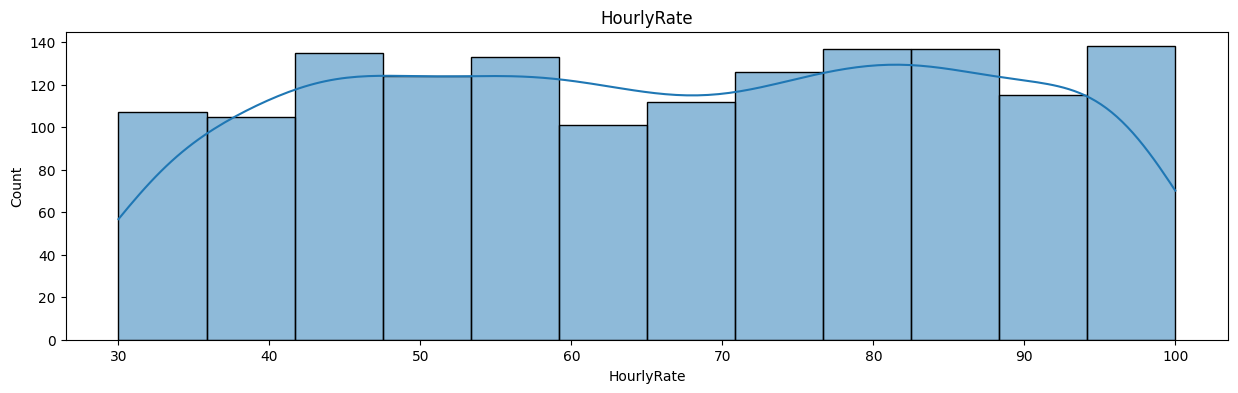

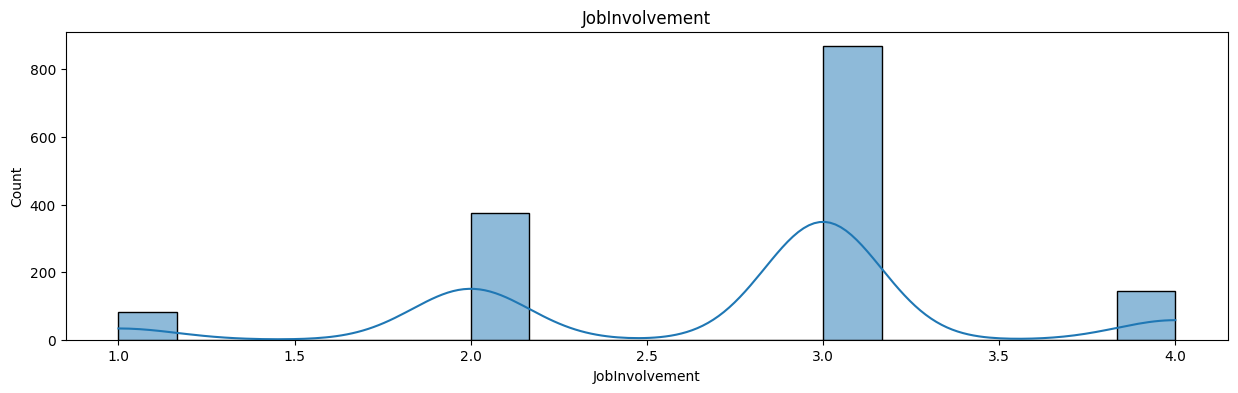

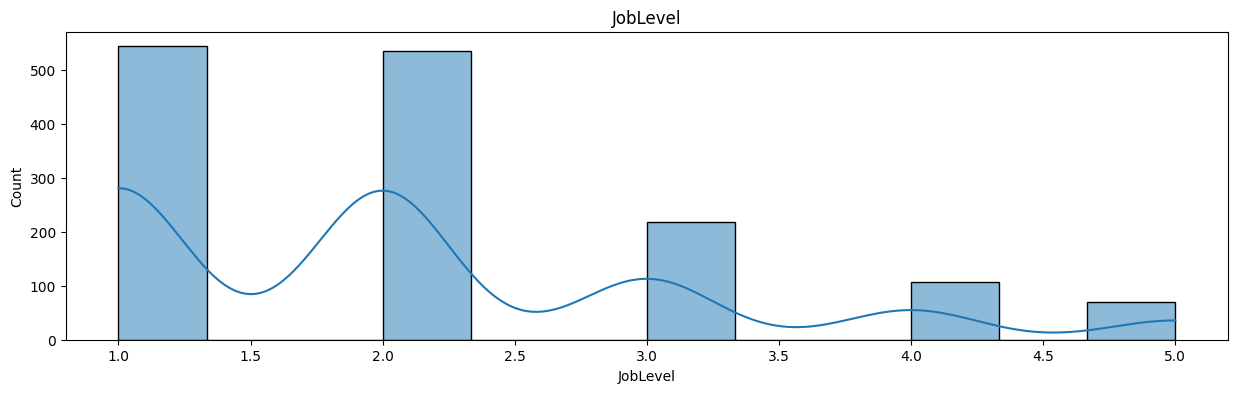

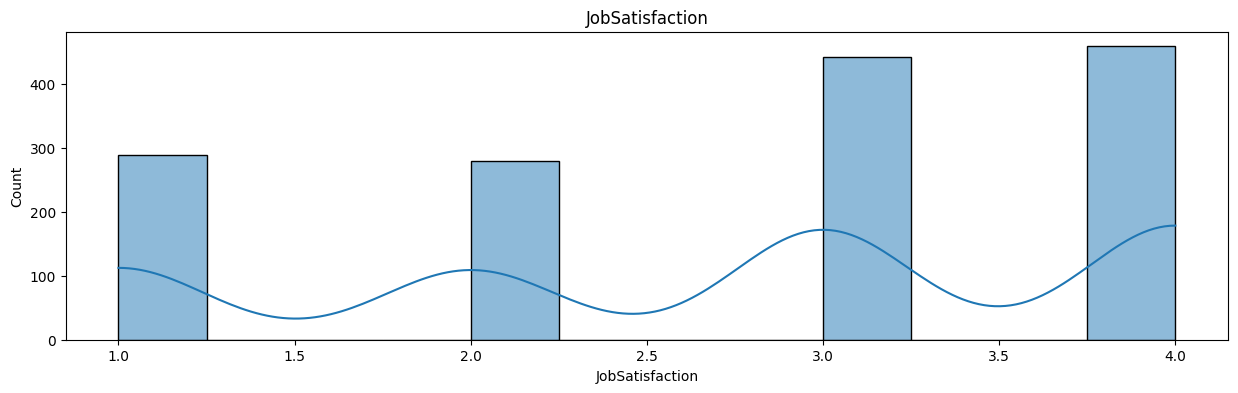

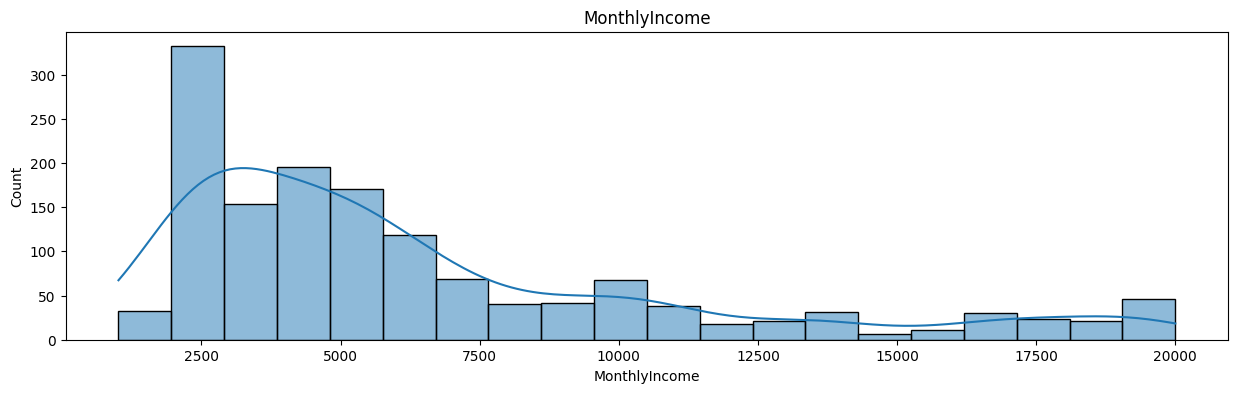

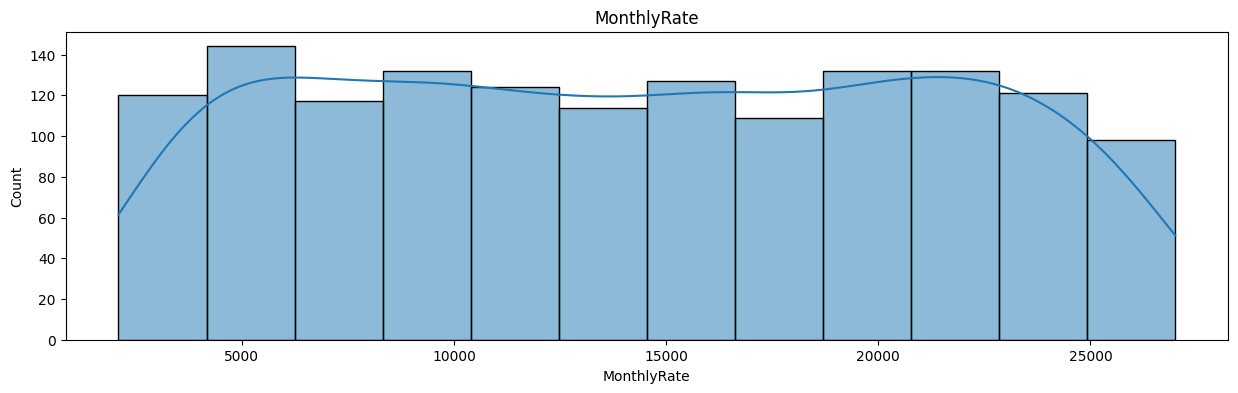

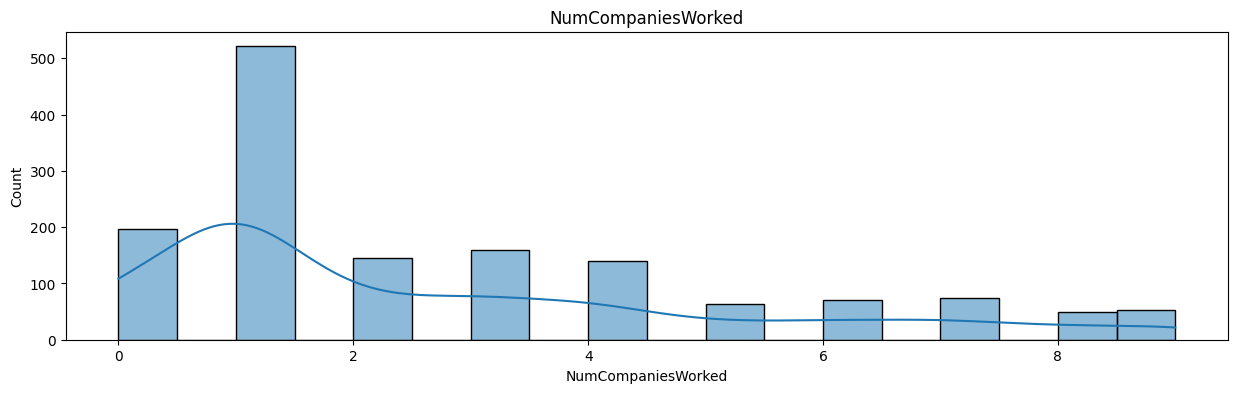

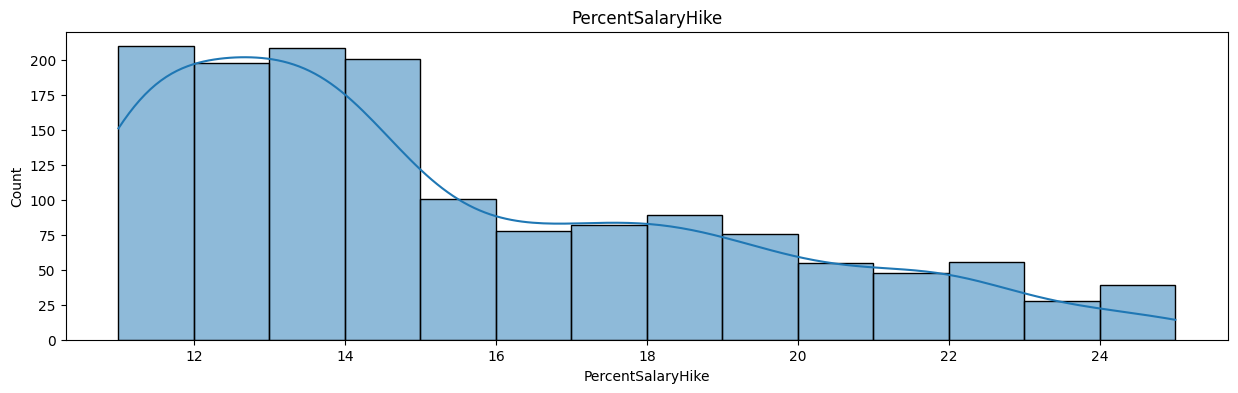

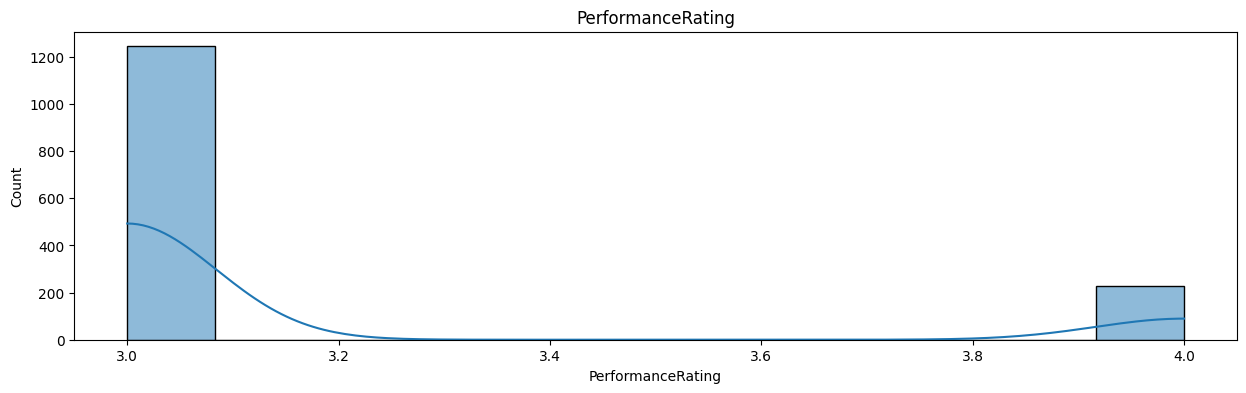

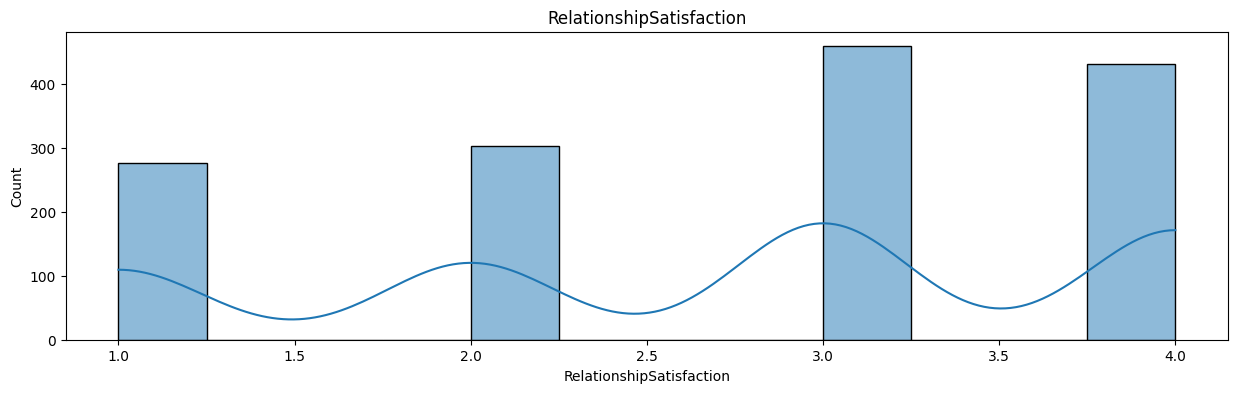

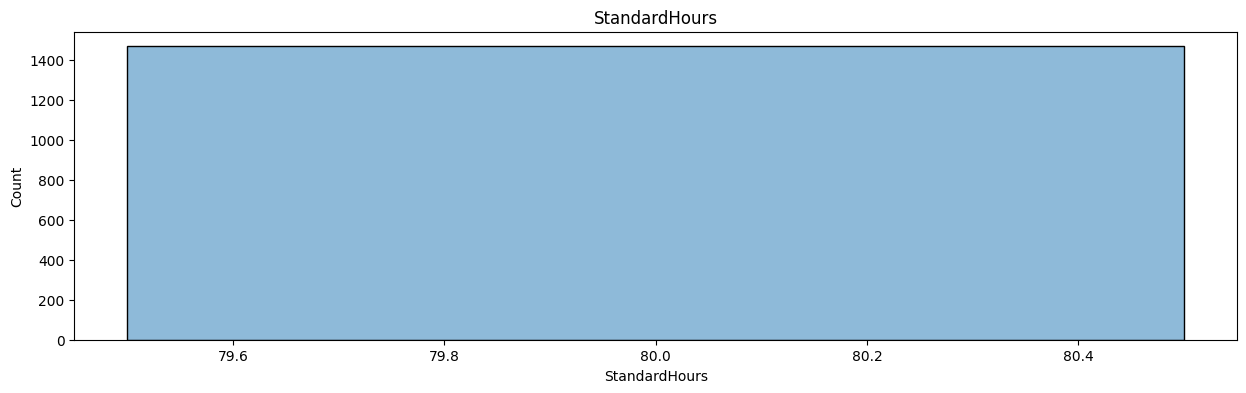

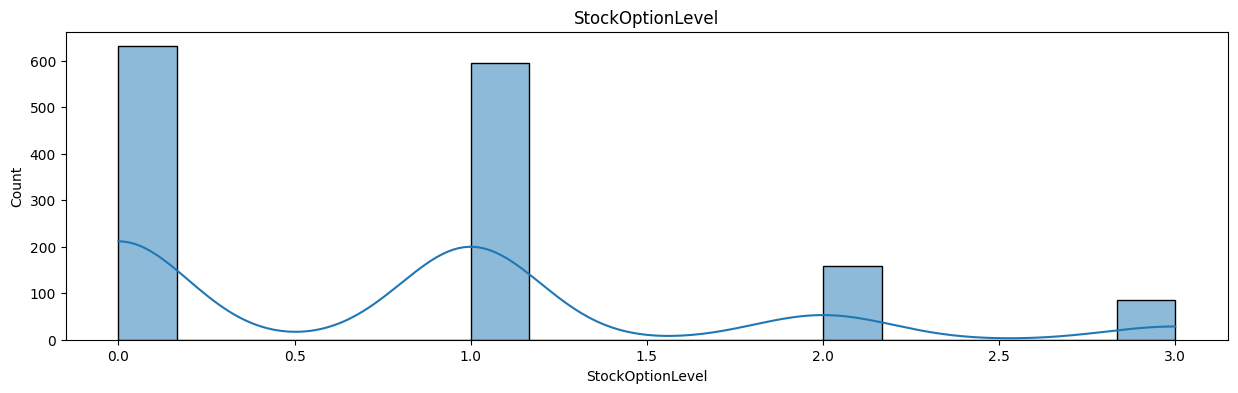

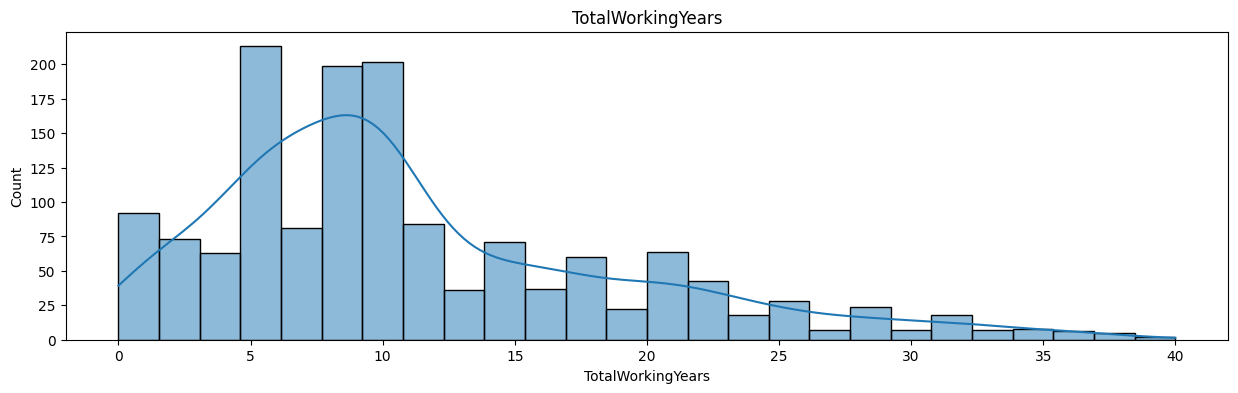

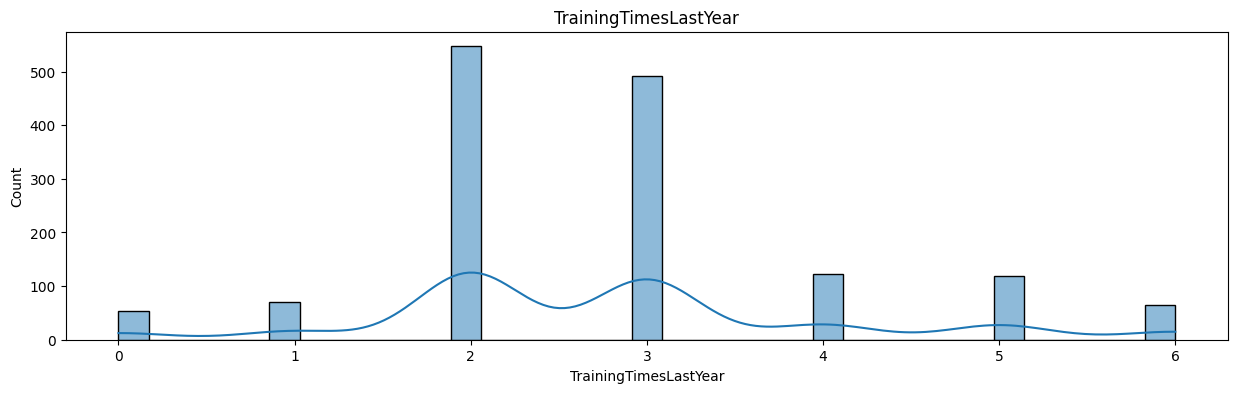

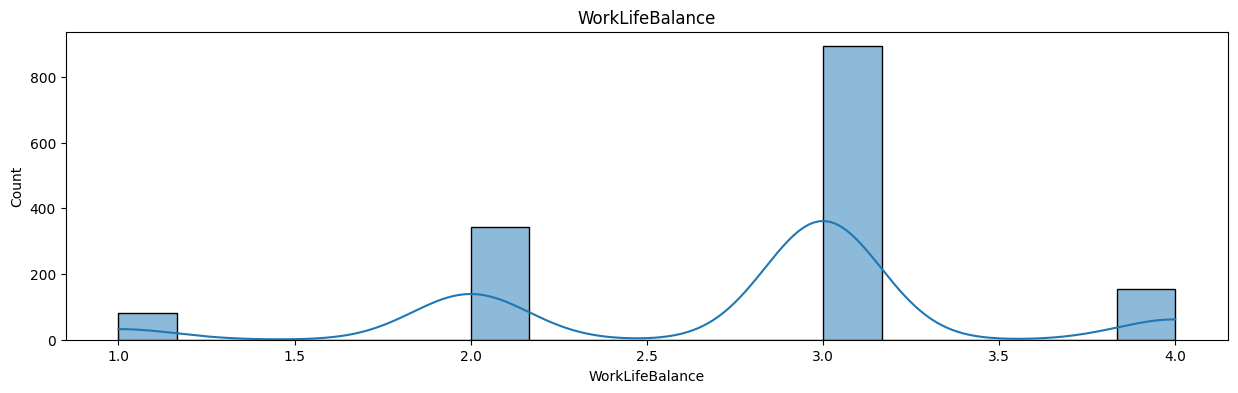

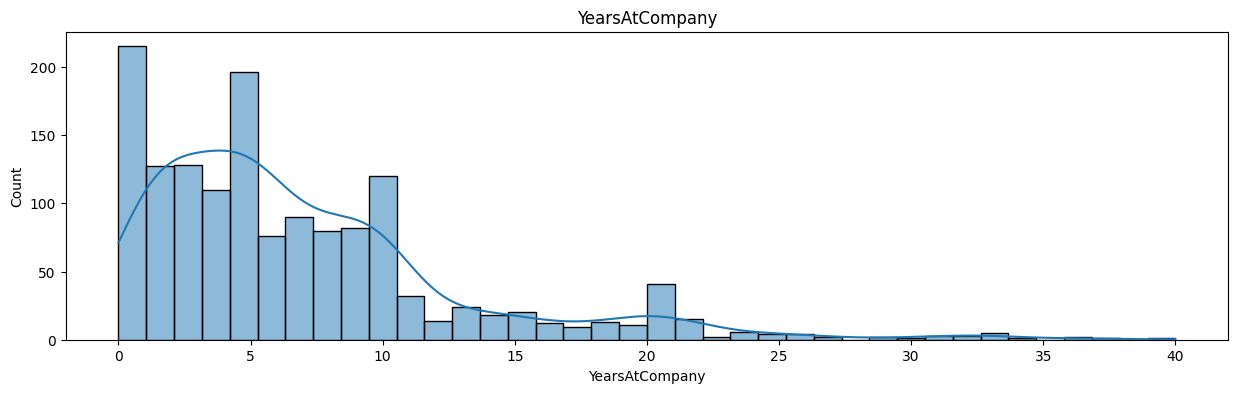

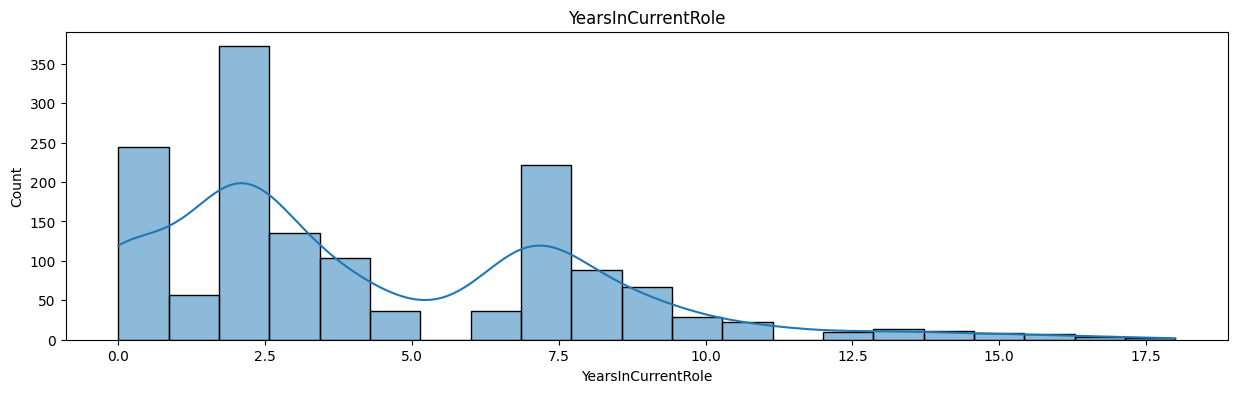

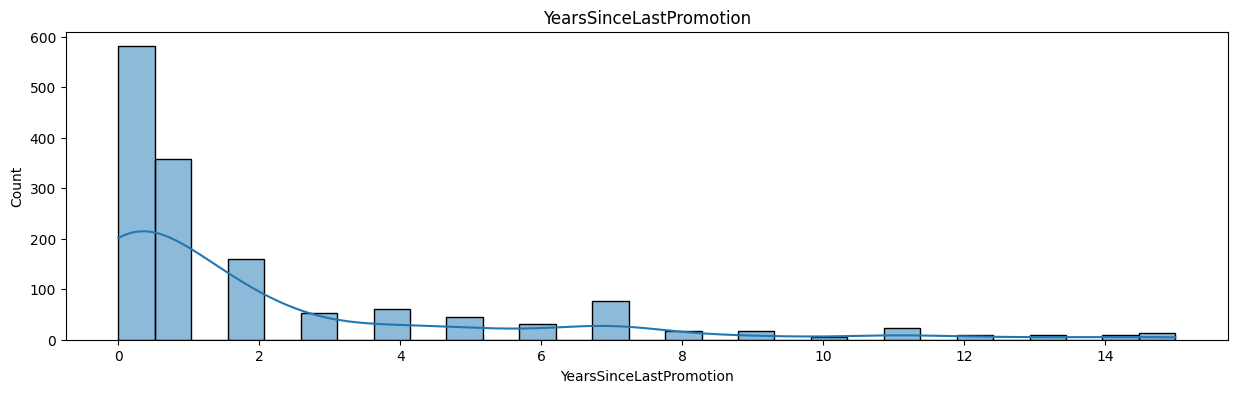

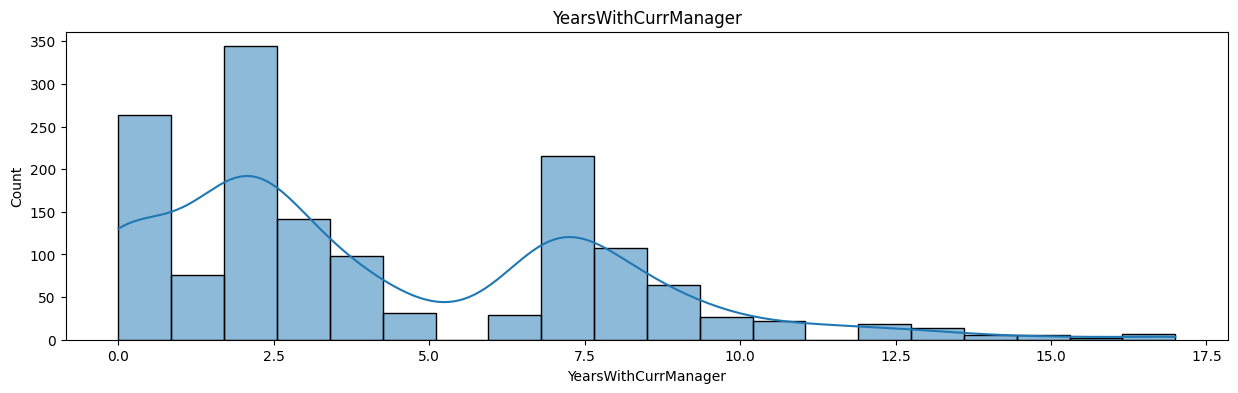

In [9]:
for i, column in enumerate(df_num, 1):
    plt.figure(figsize=(15, 4))
    sns.histplot(df_num[column], kde=True)
    plt.title(column)

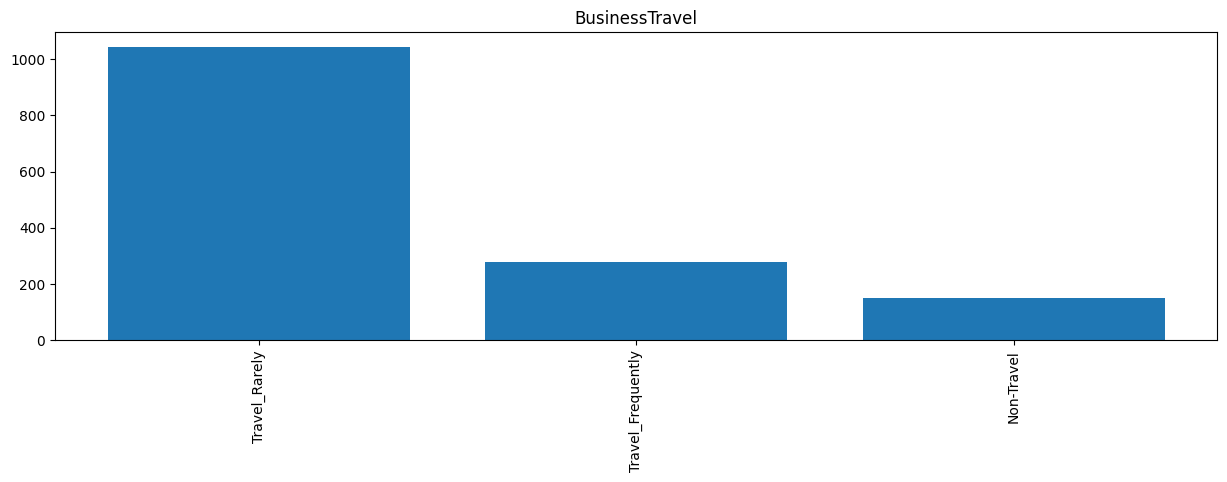

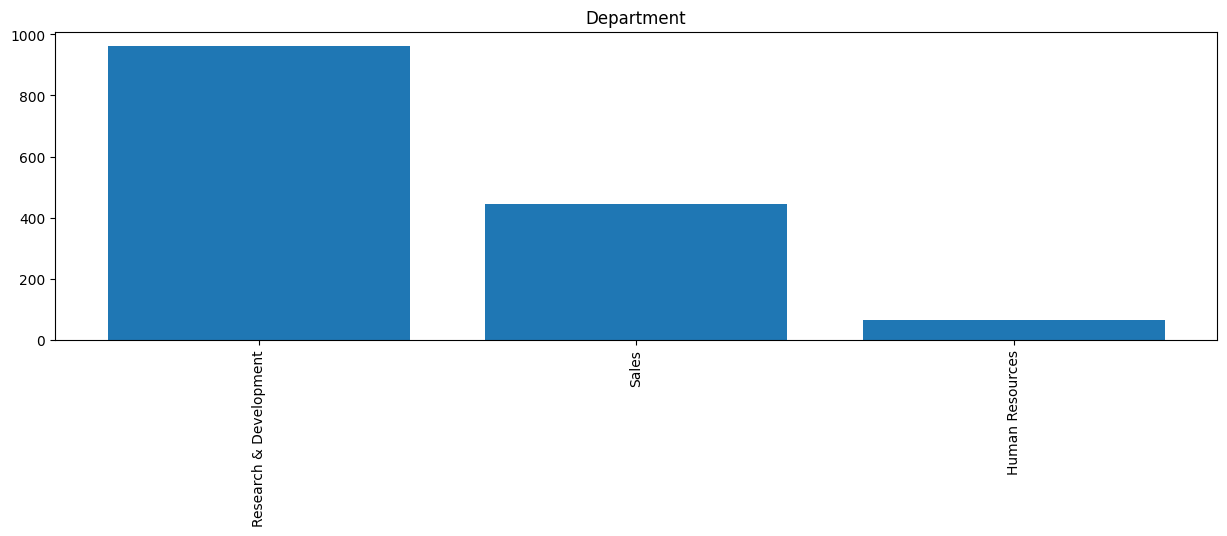

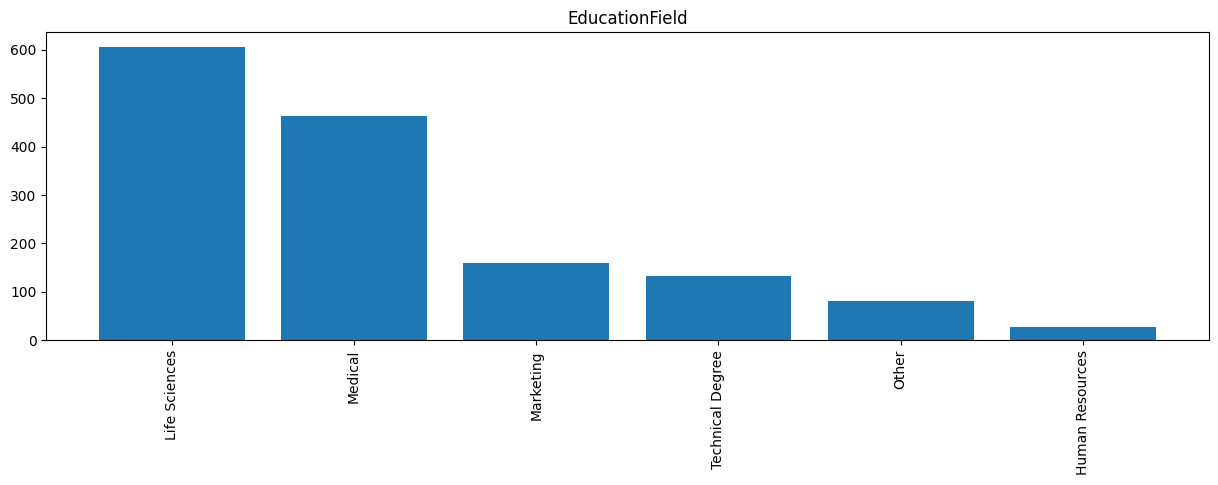

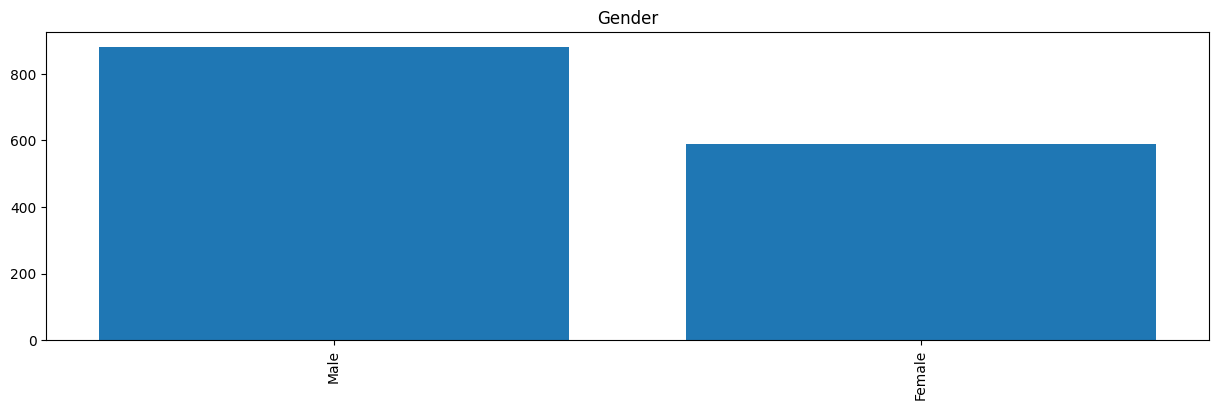

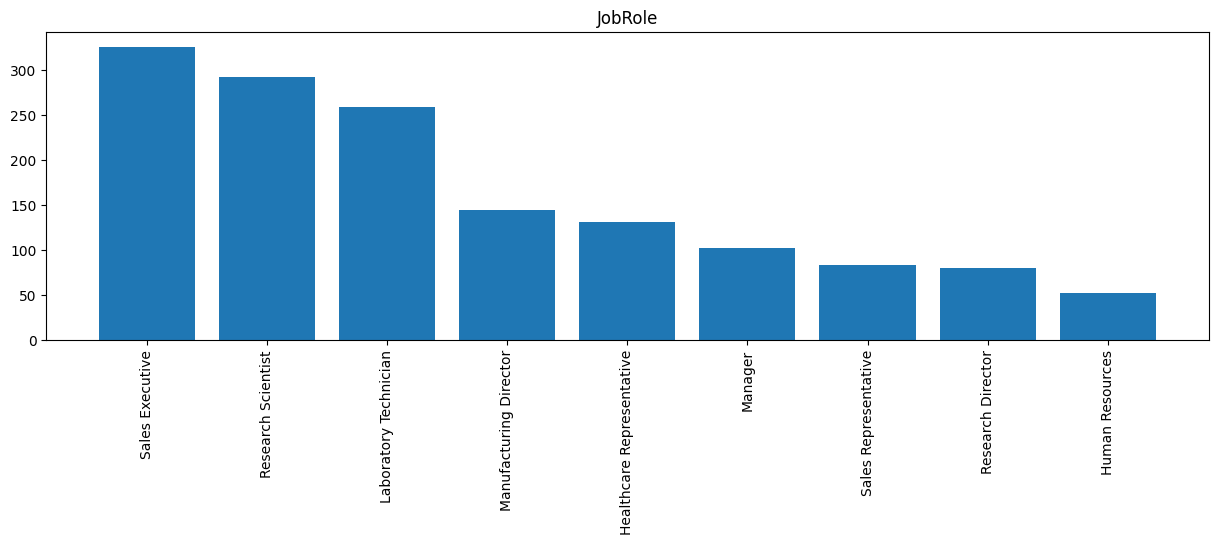

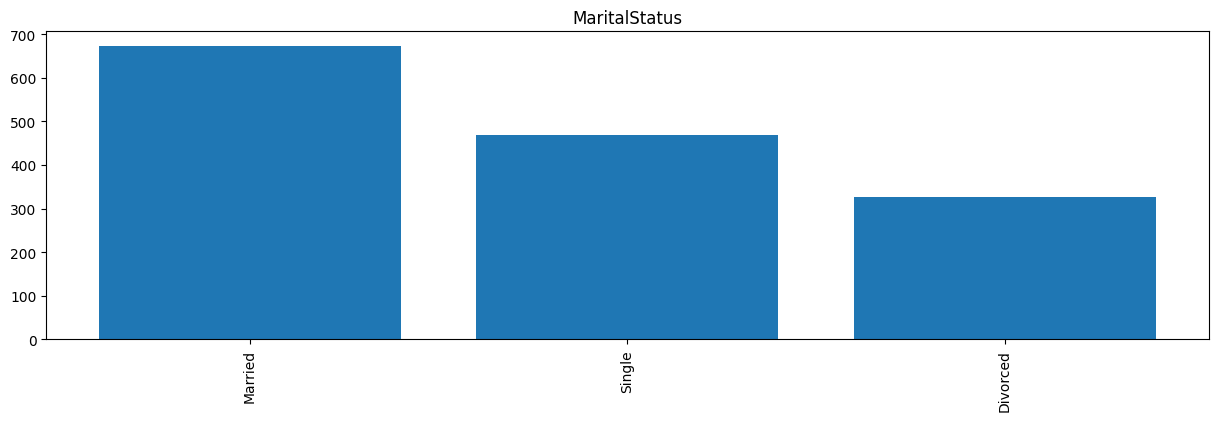

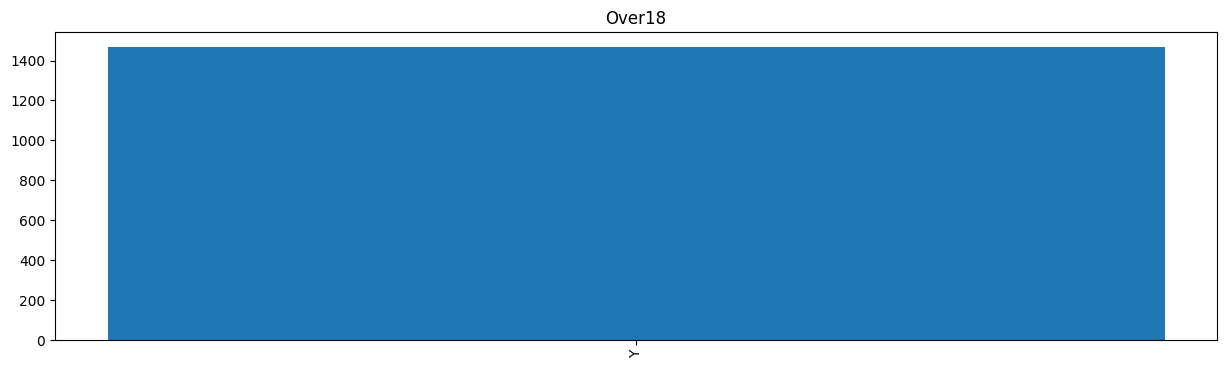

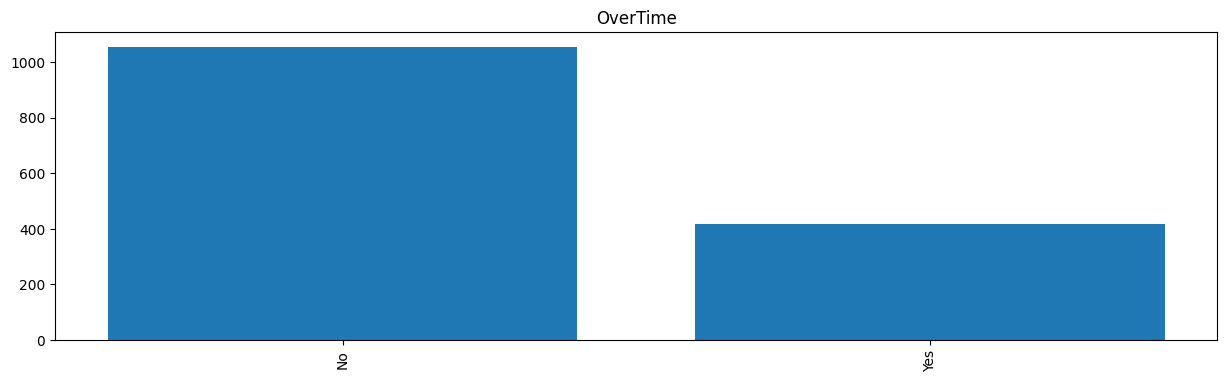

In [10]:
df_cat = df.select_dtypes(include='object').filter(regex='^(?!.*(ID|Date)).*')

for i, column in enumerate(df_cat, 1):
    plt.figure(figsize=(15, 4))
    val = df_cat[column].value_counts().head(50)
    plt.bar(val.index, val)
    plt.xticks(rotation=90)
    plt.title(column)

plt.show()

In [11]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

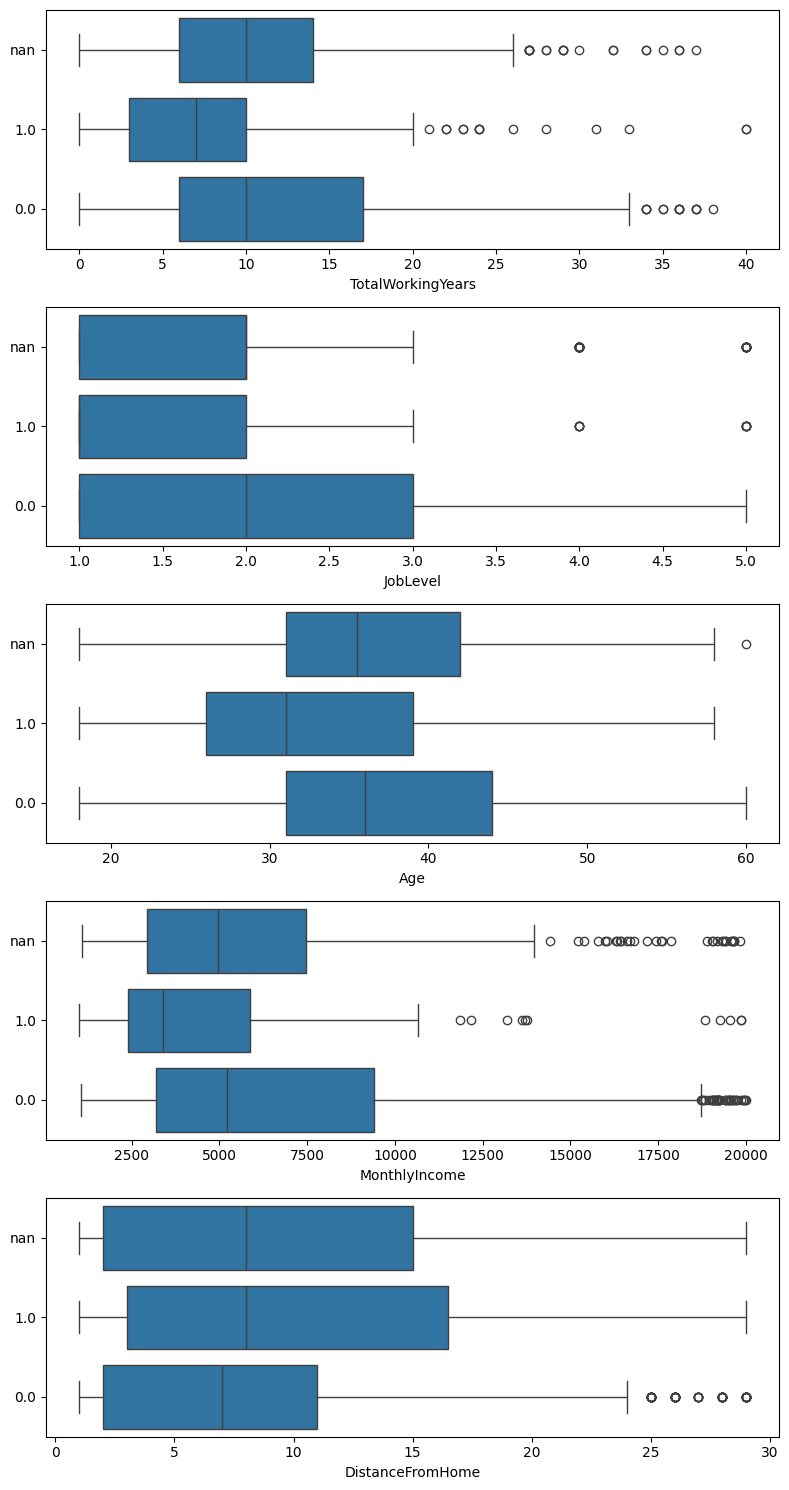

In [12]:
    df_num["Attrition"] = df["Attrition"].astype(str)  # Asumsikan 1 = keluar, 0 = menetap
numerical_dis_plot(
    features=["TotalWorkingYears", "JobLevel", "Age", "MonthlyIncome", "DistanceFromHome"], # suspect feature saya
    df=df_num,
    segment_feature="Attrition"
)

In [13]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

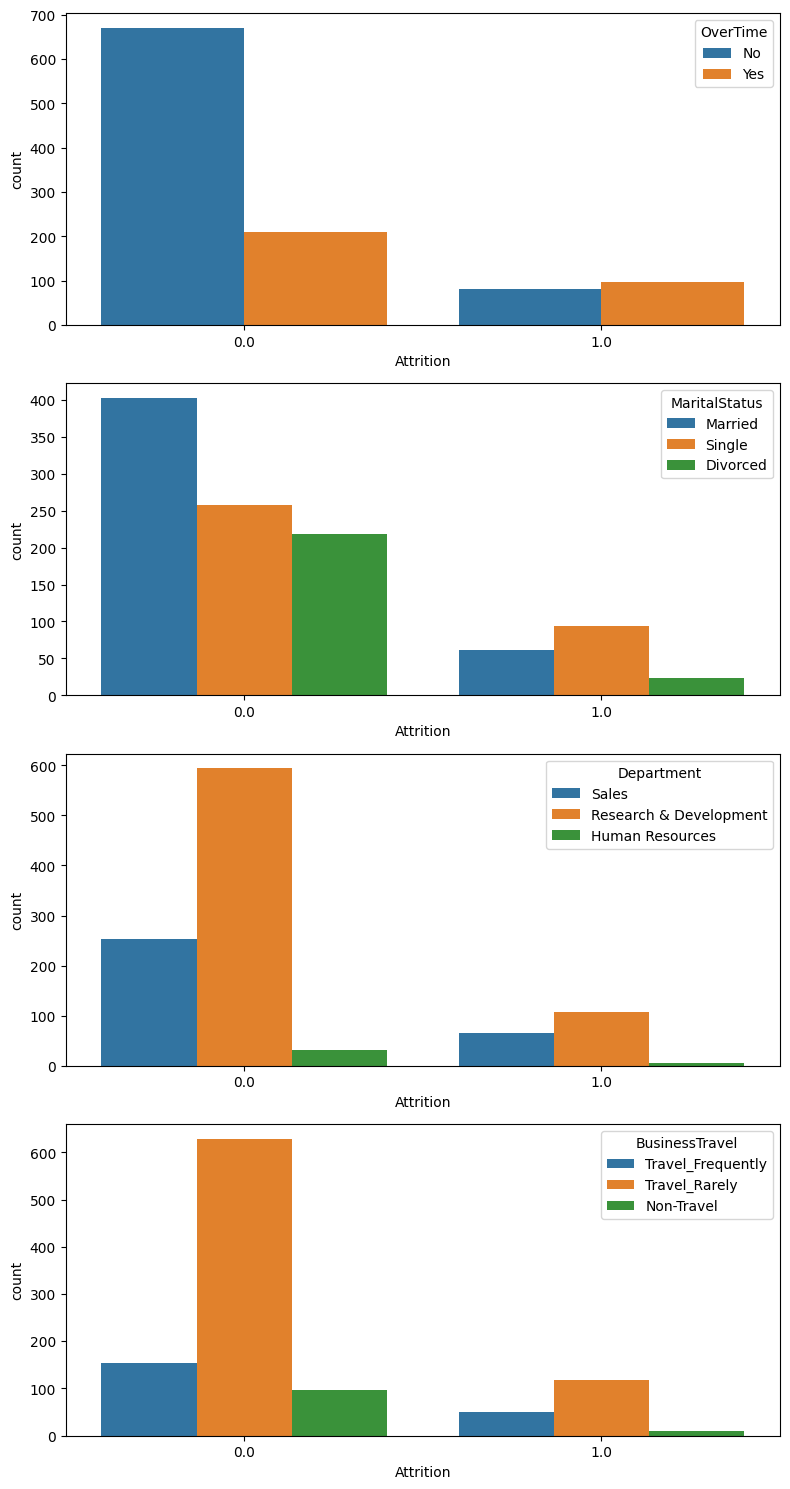

In [14]:
categorical_plot(
    features=["OverTime", "MaritalStatus", "Department", "BusinessTravel"], #feature yang saya suspect menjadi faktor attrition
    df=df,
    segment_feature="Attrition"
)

# Observasi

Setelah melihat distribusi variable numerik dan kategoris, korelasi antar variable numerik dan attrition serta hubungan variabel variabel suspect dengan attrition, berikut hasil eksplor:

- "TotalWorkingYears", "JobLevel", "Age", "MonthlyIncome", "DistanceFromHome" menjadi suspect variable numerik dibuktikan korelasinya dengan attrition yang cukup tinggi, selain itu secara logika dan domain bisnis memang field ini berpengaruh.
- "OverTime", "MaritalStatus", "Department", "BusinessTravel" menjadi suspect variabel kategoris secara dalam logika bisnis.
- Terlihat karyawan perusahaan mayoritas jarang travel/liburan
- Deppartment RnD paling banyak karyawan
- Perusahaan mayoritas laki laki lebih banyak sedikit
- Working years, gaji dan job level bervariasi
- Employee dengan attrition cenderung OverTime
- Employee attrition biasanya single, ini masuk akal karena single cenderung lebih berani mengambil peluang lain
- Seluruh employee (baik attrition atau tidak) jarang melakukan travelling
- Employee dengan attrition memiliki TotalWorkingYear lebih sedikit
- Employee dengan attrition memiliki JobLevel lebih rendah
- Employee dengan attrition memiliki Gaji lebih rendah
- Employee dengan attrition memiliki Umur lebih muda
- Employee dengan attrition memiliki Jarak rumah lebih jauh

## Data Preparation / Preprocessing

In [15]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [16]:
df.dropna(inplace=True) # mengisi missing value dirasa kurang efektif karena membuat data seakan "dibuat buat"
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [17]:
df.info() # sepertinya tipe data sudah cocok dari source data yang cukup clean

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [18]:
# dataframe utama hasil feature selection data understanding sebelumnya
main_df = pd.DataFrame(df[["Attrition", "TotalWorkingYears", "JobLevel", "Age", "MonthlyIncome", "OverTime"]])
encoder = LabelEncoder()
main_df["OverTime"] = encoder.fit_transform(main_df["OverTime"])
main_df

,Attrition,TotalWorkingYears,JobLevel,Age,MonthlyIncome,OverTime
1,1.0,15,2,37,4777,0
2,1.0,18,1,51,2461,1
3,0.0,23,4,42,13525,0
6,0.0,6,2,40,7457,1
7,1.0,24,5,55,19859,1
...,...,...,...,...,...,...
1464,1.0,10,3,28,8722,0
1465,0.0,10,3,38,7861,1
1467,1.0,1,1,28,2515,1
1468,0.0,6,1,40,3544,0


## Modeling

In [19]:
x = main_df.drop("Attrition", axis=1)
y = main_df["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(740, 5)
(318, 5)


In [20]:
rf = RandomForestClassifier(max_depth=4, random_state=42) # memilih Random Forest karena cocok dengan dataset kompleks (tidak ada korelasi jelas)
rf.fit(x_train, y_train)
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)
rf.feature_importances_

array([0.18895147, 0.06444801, 0.2614172 , 0.25093539, 0.23424793])

## Evaluation

In [21]:
accurracy_train = accuracy_score(y_train, rf_y_train_pred)
accurracy_test = accuracy_score(y_test, rf_y_test_pred)
f1_train = f1_score(y_train, rf_y_train_pred, average='weighted')
f1_test = f1_score(y_test, rf_y_test_pred, average='weighted')
print("Akurasi train:", accurracy_train)
print("Akurasi test:", accurracy_test)
print("F1 score train:", f1_train)
print("F1 score test:", f1_test)
confusion_matrix(y_test, rf_y_test_pred)

Akurasi train: 0.8581081081081081
Akurasi test: 0.8522012578616353
F1 score train: 0.8147384336431598
F1 score test: 0.8068640982430099


array([[262,   1],
       [ 46,   9]])

In [23]:
import joblib

joblib.dump(rf, 'attrition.joblib')

['attrition.joblib']